<a href="https://colab.research.google.com/github/vicross615/PostAssesment/blob/master/Telecom_customer_churn_21075653.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns













In [38]:
from google.colab import drive






In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
customers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Telecom/churn.csv')

num_rows = customers.shape[0]


print('Total number of rows: ', num_rows)

Total number of rows:  7043


In [41]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
def create_service_bundle(row):
    services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    active_services = sum([1 if row[service] in ['Yes', 'Fiber optic', 'DSL'] else 0 for service in services])
    
    if active_services >= 6:
        return 'Full Bundle'
    elif active_services >= 4:
        return 'Partial Bundle'
    else:
        return 'Basic Bundle'

customers['ServiceBundle'] = customers.apply(create_service_bundle, axis=1)

In [43]:
print(customers.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

In [44]:
print(customers['ServiceBundle'].value_counts())

Basic Bundle      2969
Full Bundle       2187
Partial Bundle    1887
Name: ServiceBundle, dtype: int64


In [45]:
servicebundle_percentages = customers['ServiceBundle'].value_counts(normalize=True) * 100

print(servicebundle_percentages)

Basic Bundle      42.155332
Full Bundle       31.052108
Partial Bundle    26.792560
Name: ServiceBundle, dtype: float64


In [46]:
grouped = customers.groupby('Churn')['ServiceBundle']

servicebundle_percentages_by_churn = grouped.value_counts(normalize=True) * 100

print(servicebundle_percentages_by_churn)

Churn  ServiceBundle 
No     Basic Bundle      42.230383
       Full Bundle       33.687669
       Partial Bundle    24.081948
Yes    Basic Bundle      41.947566
       Partial Bundle    34.296415
       Full Bundle       23.756019
Name: ServiceBundle, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers['ServiceBundle'].value_counts().plot(kind='bar')
plt.title('Counts of ServiceBundle Categories')
plt.xlabel('ServiceBundle')
plt.ylabel('Count')
plt.show()

In [48]:
pd.crosstab(customers['ServiceBundle'], customers['Churn'])

Churn,No,Yes
ServiceBundle,,
Basic Bundle,2185,784
Full Bundle,1743,444
Partial Bundle,1246,641


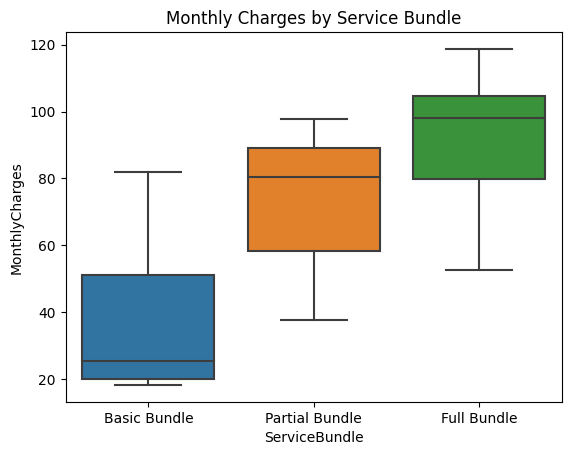

In [49]:
sns.boxplot(x='ServiceBundle', y='MonthlyCharges', data=customers)
plt.title('Monthly Charges by Service Bundle')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ServiceBundle', hue='Churn', data=customers)
plt.title('Churn by Service Bundle')
plt.show()

In [51]:
features = ['Contract', 'MonthlyCharges', 'PaymentMethod', 'SeniorCitizen', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'tenure']

In [ ]:


for feature in features:
    plt.figure(figsize=(10,8))

    plt.subplot(2, 1, 1)
    sns.countplot(data=customers, x=feature, hue='ServiceBundle')
    plt.title('Distribution of {} by ServiceBundle'.format(feature))

    plt.subplot(2, 1, 2)
    sns.countplot(data=customers, x=feature, hue='Churn')
    plt.title('Distribution of {} by Churn'.format(feature))

    plt.tight_layout()
    plt.show()

In [ ]:
servicebundle_percentages = customers['ServiceBundle'].value_counts(normalize=True) * 100

print(servicebundle_percentages)

In [81]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of ServiceBundle and Churn
contingency_table = pd.crosstab(customers['ServiceBundle'], customers['Churn'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(p)

8.187215639097966e-22


In [ ]:
churn_proportion = customers['Churn'].value_counts(normalize=True)
print(churn_proportion)

In [61]:
from sklearn.model_selection import train_test_split
# assuming df is your DataFrame
customer_features = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ServiceBundle']

# Perform one-hot encoding on 'Contract' and 'PaymentMethod'
df_encoded = pd.get_dummies(customers, columns=['Contract', 'PaymentMethod'])


features_after_encoding = df_encoded.columns.tolist()
print(features_after_encoding)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ServiceBundle', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()
target = 'Churn'

# Split the data into features (X) and target variable (y)
X = df_encoded[features_after_encoding]
X = X.drop(columns=['customerID'])

# Apply the label encoder to the 'gender' column
for feature in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    X[feature] = le.fit_transform(X[feature])

y = customers[target]
X = pd.get_dummies(X, columns=['ServiceBundle'])
y = le.fit_transform(X['Churn'])
# Now drop the 'Churn' column from X as it's your target variable and shouldn't be included in the features
X = X.drop(columns=['Churn'])
X.replace(' ', np.nan, inplace=True)
X.fillna(0, inplace=True)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

print(y_train.value_counts())

In [90]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

pipelines = {
    "Logistic Regression": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', LogisticRegression())]),
    "Decision Tree": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', DecisionTreeClassifier())]),
    "Random Forest": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', RandomForestClassifier())]),
    "Gradient Boosting": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', GradientBoostingClassifier())]),
    "Support Vector Machines": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', SVC())]),
}

hyperparameters = {
    "Logistic Regression": { 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Decision Tree": { 'clf__max_depth': list(range(1, 10))},
    "Random Forest": { 'clf__n_estimators': [50, 100, 200], 'clf__max_depth': list(range(1, 10)) },
    "Gradient Boosting": { 'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1] },
    "Support Vector Machines": { 'clf__C': [0.001, 0.01, 0.1, 1, 10], 'clf__gamma': [0.001, 0.01, 0.1, 1] }
}

outer_cv = KFold(n_splits=3, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)

models = list(pipelines.keys())

accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []
f1_scores = []

# For each model, fit the model, perform nested cross-validation, and store the evaluation metrics
for name in pipelines:
    model = GridSearchCV(pipelines[name], hyperparameters[name], cv=inner_cv, scoring='f1', error_score='raise')
    
    # Perform cross-validation and store the scores
    accuracy_cv_scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='accuracy')
    precision_cv_scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='precision')
    recall_cv_scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='recall')
    roc_auc_cv_scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='roc_auc')
    f1_cv_scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='f1')

    # Take the average of the cross-validation scores
    accuracy = accuracy_cv_scores.mean()
    precision = precision_cv_scores.mean()
    recall = recall_cv_scores.mean()
    roc_auc = roc_auc_cv_scores.mean()
    f1 = f1_cv_scores.mean()

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)

# Print the evaluation metrics for each model
for model, accuracy, precision, recall, roc_auc, f1 in zip(models, accuracy_scores, precision_scores, recall_scores, roc_auc_scores, f1_scores):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.8000
Precision: 0.6521
Recall: 0.5311
ROC-AUC: 0.8404
F1-Score: 0.5846

Model: Decision Tree
Accuracy: 0.7508
Precision: 0.5354
Recall: 0.6453
ROC-AUC: 0.7795
F1-Score: 0.5720

Model: Random Forest
Accuracy: 0.7987
Precision: 0.6739
Recall: 0.4876
ROC-AUC: 0.8416
F1-Score: 0.5684

Model: Gradient Boosting
Accuracy: 0.7978
Precision: 0.6541
Recall: 0.5069
ROC-AUC: 0.8412
F1-Score: 0.5702

Model: Support Vector Machines
Accuracy: 0.7985
Precision: 0.6570
Recall: 0.5063
ROC-AUC: 0.8329
F1-Score: 0.5713



In [91]:
# Fit the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame with coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values('Absolute Coefficient', ascending=False)

# Print the coefficients table
print(coefficients_df)

                                    Feature  Coefficient  Absolute Coefficient
5                              PhoneService    -0.641348              0.641348
19                        Contract_Two year    -0.571617              0.571617
17                  Contract_Month-to-month     0.459781              0.459781
14                         PaperlessBilling     0.405983              0.405983
8                            OnlineSecurity    -0.285118              0.285118
23               PaymentMethod_Mailed check    -0.280053              0.280053
22           PaymentMethod_Electronic check     0.278115              0.278115
1                             SeniorCitizen     0.247877              0.247877
26             ServiceBundle_Partial Bundle    -0.244937              0.244937
11                              TechSupport    -0.236765              0.236765
18                        Contract_One year    -0.227278              0.227278
3                                Dependents    -0.22

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from tabulate import tabulate

data = [
    ["Feature", "Coefficient", "Absolute Coefficient"],
    ["PhoneService", -0.641348, 0.641348],
    ["Contract_Two year", -0.571617, 0.571617],
    ["Contract_Month-to-month", 0.459781, 0.459781],
    ["PaperlessBilling", 0.405983, 0.405983],
    ["OnlineSecurity", -0.285118, 0.285118],
    ["PaymentMethod_Mailed check", -0.280053, 0.280053],
    ["PaymentMethod_Electronic check", 0.278115, 0.278115],
    ["SeniorCitizen", 0.247877, 0.247877],
    ["ServiceBundle_Partial Bundle", -0.244937, 0.244937],
    ["TechSupport", -0.236765, 0.236765],
    ["Contract_One year", -0.227278, 0.227278],
    ["Dependents", -0.226362, 0.226362],
    ["ServiceBundle_Basic Bundle", -0.220551, 0.220551],
    ["PaymentMethod_Credit card (automatic)", -0.213519, 0.213519],
    ["OnlineBackup", -0.212205, 0.212205],
    ["ServiceBundle_Full Bundle", 0.126374, 0.126374],
    ["gender", -0.124328, 0.124328],
    ["PaymentMethod_Bank transfer (automatic)", -0.123657, 0.123657],
    ["InternetService", 0.097345, 0.097345],
    ["DeviceProtection", -0.091994, 0.091994],
    ["tenure", -0.056804, 0.056804],
    ["Partner", 0.05615, 0.05615],
    ["MultipleLines", 0.050519, 0.050519],
    ["StreamingMovies", 0.030705, 0.030705],
    ["StreamingTV", -0.021629, 0.021629],
    ["MonthlyCharges", 0.014224, 0.014224],
    ["TotalCharges", 0.000287, 0.000287]
]

table = tabulate(data, headers="firstrow", tablefmt="pipe", numalign="center", floatfmt=".6f")
print(table)


| Feature                                 |  Coefficient  |  Absolute Coefficient  |
|:----------------------------------------|:-------------:|:----------------------:|
| PhoneService                            |   -0.641348   |        0.641348        |
| Contract_Two year                       |   -0.571617   |        0.571617        |
| Contract_Month-to-month                 |   0.459781    |        0.459781        |
| PaperlessBilling                        |   0.405983    |        0.405983        |
| OnlineSecurity                          |   -0.285118   |        0.285118        |
| PaymentMethod_Mailed check              |   -0.280053   |        0.280053        |
| PaymentMethod_Electronic check          |   0.278115    |        0.278115        |
| SeniorCitizen                           |   0.247877    |        0.247877        |
| ServiceBundle_Partial Bundle            |   -0.244937   |        0.244937        |
| TechSupport                             |   -0.236765   |      

In [89]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score



pipelines = {
    "Logistic Regression": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', LogisticRegression())]),
    "Decision Tree": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', DecisionTreeClassifier())]),
    "Random Forest": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', RandomForestClassifier())]),
    "Gradient Boosting": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', GradientBoostingClassifier())]),
    "Support Vector Machines": Pipeline(steps=[
        ('scl', StandardScaler()), ('clf', SVC())]),
}

hyperparameters = {
    "Logistic Regression": { 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Decision Tree": { 'clf__max_depth': list(range(1, 10))},
    "Random Forest": { 'clf__n_estimators': [50, 100, 200], 'clf__max_depth': list(range(1, 10)) },
    "Gradient Boosting": { 'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1] },
    "Support Vector Machines": { 'clf__C': [0.001, 0.01, 0.1, 1, 10], 'clf__gamma': [0.001, 0.01, 0.1, 1] }
}

outer_cv = KFold(n_splits=3, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)

models = list(pipelines.keys())

# For each model, fit the model, perform nested cross-validation, and store the F1 score
# for name in pipelines:
#     # Inner loop: hyperparameter tuning
#     model = GridSearchCV(pipelines[name], hyperparameters[name], cv=inner_cv, scoring='f1', error_score='raise')
#     model.fit(X_train, y_train)

#     # Outer loop: model selection
#     y_pred = model.predict(X_test)
#     f1 = f1_score(y_test, y_pred)
#     f1_scores.append(f1)

# # Print the F1 scores for each model
# for model, f1_score in zip(models, f1_scores):
#     print(f"Model: {model}, F1 Score: {f1_score:.4f}")

# create a bar plot of the model scores
# plt.bar(models, f1_score)
# plt.xlabel('Model')
# plt.ylabel('Average F1 Score')
# plt.title('Comparison of Machine Learning Models')
# plt.xticks(rotation=90)
# plt.show()



models = list(pipelines.keys())
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []
f1_scores = []


# For each model, fit the model, perform nested cross-validation, and store the evaluation metrics
for name in pipelines:
    # Inner loop: hyperparameter tuning
    model = GridSearchCV(pipelines[name], hyperparameters[name], cv=inner_cv, scoring='f1', error_score='raise')
    model.fit(X_train, y_train)

    # Outer loop: model selection
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)


# Print the evaluation metrics for each model
for model, accuracy, precision, recall, roc_auc, f1 in zip(models, accuracy_scores, precision_scores, recall_scores, roc_auc_scores, f1_scores):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-SCORE: {f1:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.8169
Precision: 0.6758
Recall: 0.5925
ROC-AUC: 0.7451
F1-SCORE: 0.6314

Model: Decision Tree
Accuracy: 0.7402
Precision: 0.5065
Recall: 0.7265
ROC-AUC: 0.7359
F1-SCORE: 0.5969

Model: Random Forest
Accuracy: 0.8062
Precision: 0.6736
Recall: 0.5201
ROC-AUC: 0.7147
F1-SCORE: 0.5870

Model: Gradient Boosting
Accuracy: 0.8070
Precision: 0.6760
Recall: 0.5201
ROC-AUC: 0.7152
F1-SCORE: 0.5879

Model: Support Vector Machines
Accuracy: 0.8176
Precision: 0.6921
Recall: 0.5603
ROC-AUC: 0.7353
F1-SCORE: 0.6193

